In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
t1 = dt.datetime.now()

In [3]:
# check python version
sys.version

'3.6.9 (default, Dec  8 2021, 21:08:43) \n[GCC 8.4.0]'

In [4]:
# load training dataset

home_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data"
# in_csv = "myMethod_merged_april_2016_9cam_4bands_training_dataset.csv"
in_csv = "oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv"

ds_fp = os.path.join(home_dir, in_csv)

In [5]:
in_csv.split('.')[0]

'oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime'

In [6]:
# label output file

name_tag = 'insample_'
date_tag = '19apr_lon200_220_'
output_filename = name_tag+date_tag+in_csv.split('.')[0]+'.csv'
output_filename

'insample_19apr_lon200_220_oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv'

In [7]:
# read data

ds_3cam = pd.read_csv(ds_fp)
ds_3cam.head(5)

,Unnamed: 0,#path,orbit,img_block,line,sample,lat,lon,an,ca,cf,rms,orbit_start,orbit_stop
0,0,79,86932,32,411,771,71.753167,203.918390,0.654443,0.755881,0.791431,12.678750,2016-04-21 22:01:26+00:00,2016-04-21 23:40:20+00:00
1,1,79,86932,32,411,772,71.750189,203.921959,0.666452,0.778317,0.776579,12.010000,2016-04-21 22:01:26+00:00,2016-04-21 23:40:20+00:00
2,2,79,86932,32,412,772,71.749996,203.922187,0.676406,0.780845,0.787165,8.312353,2016-04-21 22:01:26+00:00,2016-04-21 23:40:20+00:00
3,3,79,86932,32,413,773,71.746816,203.925895,0.697736,0.813235,0.787481,9.718824,2016-04-21 22:01:26+00:00,2016-04-21 23:40:20+00:00
4,4,79,86932,32,414,773,71.743552,203.929087,0.713062,0.790641,0.801069,16.385000,2016-04-21 22:01:26+00:00,2016-04-21 23:40:20+00:00


In [8]:
# # remove lines with zero
# # Note: we must put each condition within parenthesis

# # we use 3 filters to make sure we find every zero row and copy the filterd DF to new one
# in_ds = in_ds.loc[(in_ds['#path']!=0) &
#                  (in_ds[' orbit'] !=0) &
#                  (in_ds[' img_block'] !=0)]
# in_ds.head()

In [9]:
ds_3cam.shape

(120969, 14)

In [10]:
# # ds_3cam = in_ds[["path", "orbit", "block", "line", "sample", "lat", "lon", "Ca_r", "Cf_r", "An_r", "mean_ATM_roughness"]] # add path & block here

# ds_3cam = in_ds[["#path", " orbit", " img_block", " line", " sample", " lat", " lon", " an", " ca", " cf", " rms"]] # add path & block here


In [11]:
# ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
ds_3cam.columns

Index(['Unnamed: 0', '#path', ' orbit', ' img_block', ' line', ' sample',
       ' lat', ' lon', ' an', ' ca', ' cf', ' rms', 'orbit_start',
       'orbit_stop'],
      dtype='object')

In [12]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
xlon = ds_3cam[' lon']
ylat = ds_3cam[' lat']

# xlon = ds_3cam['lon']
# ylat = ds_3cam['lat']

margin = 2 # buffer to add to the range
lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [13]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

68.108051
85.250886
197.591141
276.552118


In [14]:
# for plotting needed 
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [15]:
# # ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [16]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [17]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [18]:
# needed for plotting
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

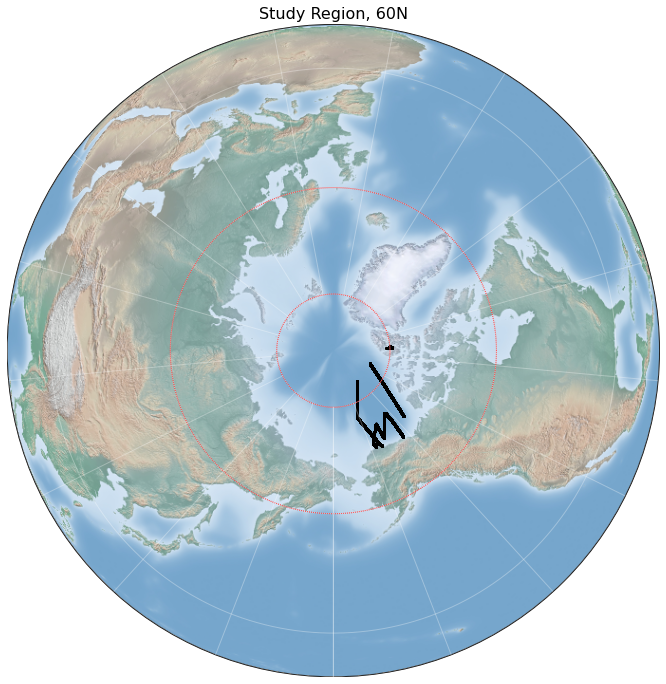

In [19]:
# run with oython >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon, ylat)

## filter ATM locations

In [20]:
# extract transect by date
# filter for 19-april and then plot the transect for both my method and old method and then compare...

transect = ds_3cam.loc[(ds_3cam['orbit_start'] >= '2016-04-19 00:00:00') & 
                             (ds_3cam['orbit_stop'] <= '2016-04-19 12:00:0')]
transect.head()

,Unnamed: 0,#path,orbit,img_block,line,sample,lat,lon,an,ca,cf,rms,orbit_start,orbit_stop
2257,2257,106,86890,13,476,724,79.833672,273.193115,0.618979,0.773878,1.058473,8.145106,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2258,2258,106,86890,13,477,724,79.834485,273.193192,0.614676,0.770804,1.059088,8.126279,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2259,2259,106,86890,13,477,723,79.835840,273.193339,0.619594,0.779410,1.058473,8.103906,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2260,2260,106,86890,13,478,723,79.838281,273.193639,0.617750,0.772034,1.059702,7.265312,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2261,2261,106,86890,13,478,722,79.839366,273.193783,0.622053,0.781254,1.049867,9.324225,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00


In [21]:
transect[' lon'].min()

199.591141

In [22]:
# extract transect by guessing longitudes
transect = transect.loc[(transect[' lon'] > 200.0) & 
                        (transect[' lon'] < 220.0)]
transect.head()


,Unnamed: 0,#path,orbit,img_block,line,sample,lat,lon,an,ca,cf,rms,orbit_start,orbit_stop
5830,5830,154,86893,13,18,874,78.777028,201.959473,0.577882,0.768202,1.160608,16.702500,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
5831,5831,154,86893,13,17,874,78.775971,201.957275,0.545354,0.740519,1.152995,13.060000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
5832,5832,154,86893,13,17,875,78.774650,201.954527,0.554351,0.743979,1.146074,12.275000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
5833,5833,154,86893,13,17,876,78.772007,201.949024,0.571653,0.752976,1.170297,13.863333,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
5834,5834,154,86893,13,16,876,78.770422,201.945720,0.561964,0.755052,1.150919,10.940000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00


In [23]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect.head()

# set that column as index
# lon_subset.set_index['index']

,Unnamed: 0,#path,orbit,img_block,line,sample,lat,lon,an,ca,cf,rms,orbit_start,orbit_stop
1,5830,154,86893,13,18,874,78.777028,201.959473,0.577882,0.768202,1.160608,16.702500,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
2,5831,154,86893,13,17,874,78.775971,201.957275,0.545354,0.740519,1.152995,13.060000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
3,5832,154,86893,13,17,875,78.774650,201.954527,0.554351,0.743979,1.146074,12.275000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
4,5833,154,86893,13,17,876,78.772007,201.949024,0.571653,0.752976,1.170297,13.863333,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00
5,5834,154,86893,13,16,876,78.770422,201.945720,0.561964,0.755052,1.150919,10.940000,2016-04-19 05:44:58+00:00,2016-04-19 07:23:51+00:00


In [24]:
# needed for plotting

xlon270 = transect[' lon']
ylat270 = transect[' lat']

0

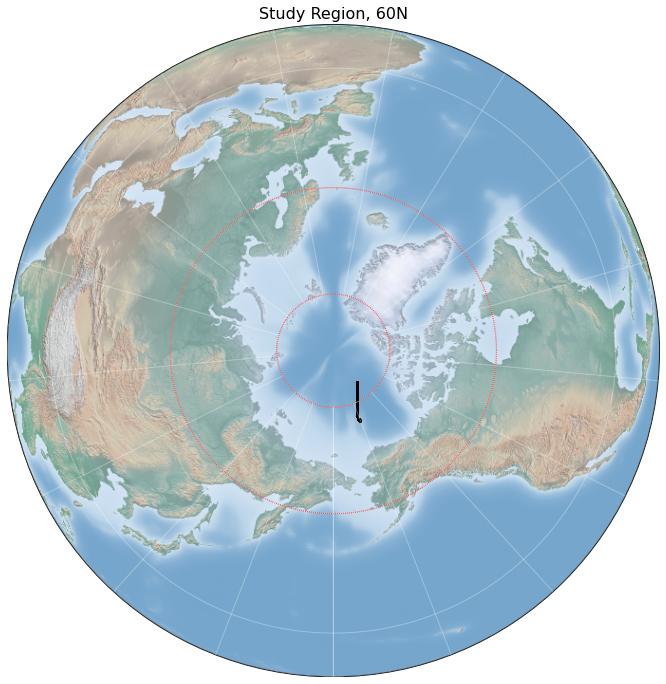

In [25]:
# run with python >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon270, ylat270)

In [26]:
# # select a smaller subset of transect, like the first 1000 points (or 10)

# transect_small = transect.iloc[0:10000]
# transect_small.head()

In [27]:
# extract transect data & write it out

output_path = home_dir
output_file_fp = os.path.join(output_path, output_filename)
transect.to_csv(output_file_fp)
output_file_fp

'/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data/insample_19apr_lon200_220_oldMethod_MisrAtmCalibratedModel_april_2016_training_dataset_datetime.csv'

In [28]:
t2 = dt.datetime.now()
runtime = t2-t1
runtime

datetime.timedelta(0, 8, 629818)